In [2]:
import importlib.util
spec = importlib.util.spec_from_file_location("BoundaryLayerToolbox", "/Users/claudiopierard/VC/BoundaryLayerToolbox.py")
blt = importlib.util.module_from_spec(spec)
spec.loader.exec_module(blt)
import matplotlib
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy as spy
import scipy.io as sio
import scipy.optimize as optimization
import scipy.interpolate as interpolate
from netCDF4 import Dataset
import os
import pandas as pd
#pd.set_option('html', False)
from IPython import display

#matplotlib
from matplotlib import animation
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
import datetime

from scipy.stats import stats

xlat = np.loadtxt("/Users/claudiopierard/VC/datos/xlat_d02_interpolado.txt")
xlong = np.loadtxt("/Users/claudiopierard/VC/datos/xlong_d02_interpolado.txt")
hgt = np.loadtxt("/Users/claudiopierard/VC/datos/hgt_d02_interpolado.txt")
#months = {1:'jun', 2:'feb', 3:'mar',4: 'apr', 5:'may', 6:'jun', 7:'jul', 8:'aug', 9:'sep', 10:'oct', 11:'nov', 12:'dic'}
path2datosVC = "../datos/dataframes_VC/cca/"
path2pollutants = "../datos/contaminantes/2015/CCA/"
path2VCmax = "/Users/claudiopierard/VC/datos/VC_maximos/cca/"
path2VCprom = "/Users/claudiopierard/VC/datos/VC_promedio/cca/"

path2estaciones = "../datos/loc_estaciones/air_quality_stn.xy"
estaciones = pd.read_table(path2estaciones, index_col=0, names=['long','lat', 'height'])
estaciones = estaciones.transpose().to_dict()
estaciones['CCA']

months = {'jan': '01', 'feb': '02', 'mar': '03', 'apr': '04', 'may': '05', 'jun': '06', 'jul': '07', 'aug': '08', 'sep': '09', 'oct':'10', 'nov':'11', 'dic': '12'}

In [3]:
apr = pd.read_csv(path2VCmax + 'apr_VC_max_cca.csv', index_col=0)
apr.index = pd.to_datetime(apr.index)

In [4]:
apr.head(10)

,VC_24,pblh_24,u_mean_24,date_time
2015-04-01,NaN,NaN,NaN,NaN
2015-04-02,7971.0,1878.37,4.25,2015-04-02 16:00:00
2015-04-03,7652.0,2116.26,3.76,2015-04-03 18:00:00
2015-04-04,8653.0,2379.83,3.63,2015-04-04 18:00:00
2015-04-05,6196.0,2542.32,2.44,2015-04-05 18:00:00
2015-04-06,7004.0,2842.08,2.46,2015-04-06 18:00:00
2015-04-07,6146.0,990.57,6.06,2015-04-07 20:00:00
2015-04-08,5367.0,1147.95,4.68,2015-04-08 18:00:00
2015-04-09,8868.0,3046.25,2.98,2015-04-09 18:00:00
2015-04-10,8715.0,2988.38,2.92,2015-04-10 17:00:00


(array([735689., 735692., 735695., 735698., 735701., 735704., 735707.,
        735710., 735713., 735716., 735719.]),
 <a list of 11 Text xticklabel objects>)

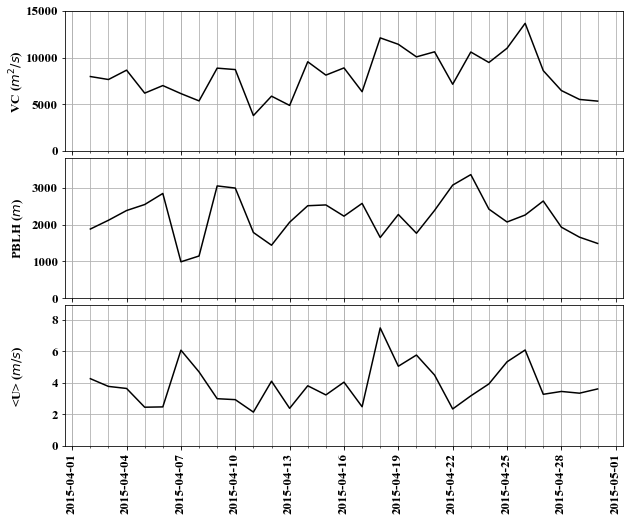

In [5]:
import matplotlib.gridspec as gridspec
plt.rcParams['font.family'] = "Times New Roman"
plt.rcParams.update({'font.size': 13})

minor_axis = pd.date_range('2015-04-01', '2015-04-30', freq='1D')

plt.figure(figsize = (10,8))
gs1 = gridspec.GridSpec(3,1)
gs1.update(hspace=0.05) # set the spacing between axes. 

ax1 = plt.subplot(gs1[0])
ax1.plot(apr['VC_24'], color = 'k')
ax1.set_xticks(minor_axis, minor=True)
ax1.grid(which='both')
ax1.tick_params(labelbottom=False)
ax1.set_ylabel('VC ($m^2/s$)')
ax1.set_ylim(0, 15000)
ax1.get_yaxis().set_label_coords(-0.07,0.5)

ax2 = plt.subplot(gs1[1])
ax2.plot(apr['pblh_24'], color = 'k')
ax2.set_xticks(minor_axis, minor=True)
ax2.grid(which='both')
ax2.tick_params(labelbottom=False)
ax2.set_ylabel('PBLH ($m$)')
ax2.set_ylim(0, 3800)
ax2.get_yaxis().set_label_coords(-0.07,0.5)

ax3 = plt.subplot(gs1[2])
ax3.plot(apr['u_mean_24'], color = 'k')
ax3.set_xticks(minor_axis, minor=True)
ax3.grid(which='both')
ax3.set_ylabel('<U> ($m/s$)')
ax3.set_ylim(0, 8.9)
ax3.get_yaxis().set_label_coords(-0.07,0.5)

plt.xticks(rotation=90)

# VC máximo promedio mensual

In [6]:
anual = pd.read_csv(path2VCmax + 'VC_max_anual_cca.csv', index_col=0)

In [7]:
anual = anual.sort_index()

In [8]:
6744-8139

-1395

In [9]:
anual

,VC_24,VC_24_std,pblh_24,pblh_24_std,u_mean_24,u_mean_24_std
month_ix,,,,,,
1,4322.24,1087.97,1676.08,552.07,3.07,1.89
2,5738.21,1961.81,1747.08,648.06,3.89,2.09
3,6744.23,4231.42,1734.47,543.90,4.33,2.71
4,8139.48,2390.01,2207.11,580.61,3.88,1.31
5,6010.35,1363.36,2216.56,667.85,3.03,1.29
6,5901.10,1467.36,1904.73,557.29,3.35,1.43
7,6752.58,2048.89,1947.22,524.71,3.81,1.96
8,7371.68,2355.23,1777.22,694.66,5.10,2.96
9,5478.37,1899.67,1700.88,561.58,3.56,2.02


In [10]:
anual.u_mean_24.mean()

3.7133333333333343

In [11]:
meses_nom = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DIC']

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 12 Text xticklabel objects>)

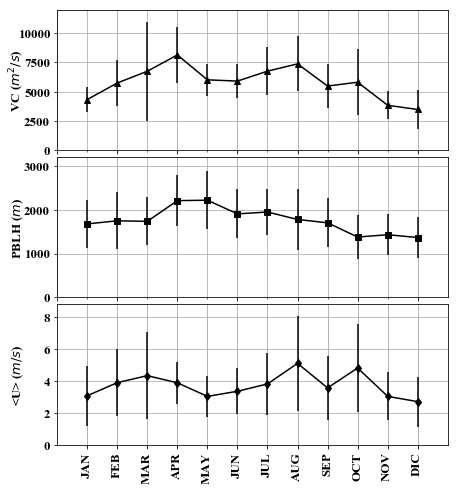

In [12]:
import matplotlib.gridspec as gridspec
plt.rcParams['font.family'] = "Times New Roman"
plt.rcParams.update({'font.size': 13})

minor_axis = np.linspace(1, 12, 12)

plt.figure(figsize = (7,8))
gs1 = gridspec.GridSpec(3,1)
gs1.update(hspace=0.05) # set the spacing between axes. 

ax1 = plt.subplot(gs1[0])
ax1.plot(anual['VC_24'], color = 'k')
ax1.errorbar(anual.index.values, anual['VC_24'].values, yerr=anual['VC_24_std'].values, fmt='^', color = 'k')
ax1.set_xticks(minor_axis, minor=True)
ax1.grid(which='both')
ax1.tick_params(labelbottom=False)
ax1.set_ylabel('VC ($m^2/s$)')
ax1.set_xlim(0, 13)
ax1.set_ylim(0, 12000)
ax1.get_yaxis().set_label_coords(-0.08,0.5)

ax2 = plt.subplot(gs1[1])
ax2.plot(anual['pblh_24'], color = 'k')
ax2.errorbar(anual.index.values, anual['pblh_24'].values, yerr=anual['pblh_24_std'].values, fmt='s', color = 'k')
ax2.set_xticks(minor_axis, minor=True)
ax2.grid(which='both')
ax2.tick_params(labelbottom=False)
ax2.set_ylabel('PBLH ($m$)')
ax2.set_ylim(0, 3200)
ax2.set_xlim(0, 13)
ax2.get_yaxis().set_label_coords(-0.08,0.5)

ax3 = plt.subplot(gs1[2])
ax3.plot(anual['u_mean_24'], color = 'k')
ax3.errorbar(anual.index.values, anual['u_mean_24'].values, yerr=anual['u_mean_24_std'].values, fmt='d', color = 'k')
ax3.set_xticks(minor_axis, minor=True)
ax3.grid(which='both')
ax3.set_ylabel('<U> ($m/s$)')
ax3.set_xlim(0, 13)
ax3.set_ylim(0, 8.8)
ax3.get_yaxis().set_label_coords(-0.08,0.5)
ax3.set_xticks(range(1,13));
ax3.set_xticklabels(meses_nom);

plt.xticks(rotation=90)

In [13]:
apr['VC_24'].std()

2390.009617743495

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 12 Text xticklabel objects>)

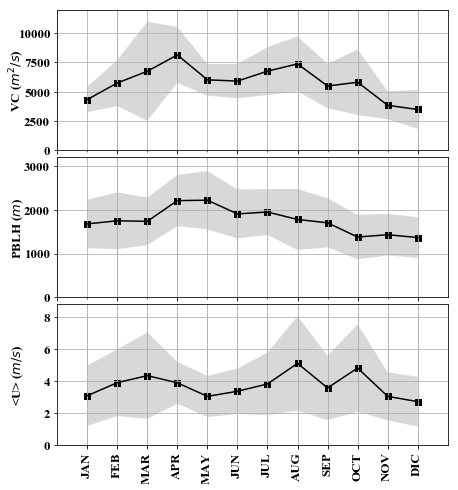

In [14]:
import matplotlib.gridspec as gridspec
plt.rcParams['font.family'] = "Times New Roman"
plt.rcParams.update({'font.size': 13})

minor_axis = np.linspace(1, 12, 12)

plt.figure(figsize = (7,8))
gs1 = gridspec.GridSpec(3,1)
gs1.update(hspace=0.05) # set the spacing between axes. 

ax1 = plt.subplot(gs1[0])

ax1.plot(anual['VC_24'], color = 'k')
ax1.fill_between(minor_axis, anual['VC_24'] - anual['VC_24_std'], anual['VC_24'] + anual['VC_24_std'], facecolor= 'grey', alpha=0.3, edgecolor='none')
ax1.scatter(anual.index.values, anual['VC_24'].values, marker = 's', color = 'k')

ax1.set_xticks(minor_axis, minor=True)
ax1.grid(which='both')
ax1.tick_params(labelbottom=False)
ax1.set_ylabel('VC ($m^2/s$)')
ax1.set_xlim(0, 13)
ax1.set_ylim(0, 12000)
ax1.get_yaxis().set_label_coords(-0.08,0.5)

ax2 = plt.subplot(gs1[1])

ax2.plot(anual['pblh_24'], color = 'k')
ax2.fill_between(minor_axis, anual['pblh_24'] - anual['pblh_24_std'], anual['pblh_24'] + anual['pblh_24_std'], facecolor= 'grey', alpha=0.3, edgecolor='none')
ax2.scatter(anual.index.values, anual['pblh_24'].values, marker = 's', color = 'k')

ax2.set_xticks(minor_axis, minor=True)
ax2.grid(which='both')
ax2.tick_params(labelbottom=False)
ax2.set_ylabel('PBLH ($m$)')
ax2.set_ylim(0, 3200)
ax2.set_xlim(0, 13)
ax2.get_yaxis().set_label_coords(-0.08,0.5)

ax3 = plt.subplot(gs1[2])

ax3.plot(anual['u_mean_24'], color = 'k')
ax3.fill_between(minor_axis, anual['u_mean_24'] - anual['u_mean_24_std'], anual['u_mean_24'] + anual['u_mean_24_std'], facecolor= 'grey', alpha=0.3, edgecolor='none')
ax3.scatter(anual.index.values, anual['u_mean_24'].values, marker = 's', color = 'k')

ax3.set_xticks(minor_axis, minor=True)
ax3.grid(which='both')
ax3.set_ylabel('<U> ($m/s$)')
ax3.set_xlim(0, 13)
ax3.set_ylim(0, 8.8)
ax3.get_yaxis().set_label_coords(-0.08,0.5)
ax3.set_xticks(range(1,13));
ax3.set_xticklabels(meses_nom);

plt.xticks(rotation=90)

# Promedio de los máximos

In [15]:
VC_prom_max_anual = anual['VC_24'].mean()

In [16]:
VC_prom_max_anual

5797.012500000001

In [17]:
path2Dataframes = '../datos/dataframes_VC/cca/'

In [18]:
vc_anual = pd.DataFrame()

for mm in months.keys():
    loc_path = path2Dataframes + mm + '_dataframe_cca.csv'
    comosea = pd.read_csv(loc_path, index_col=0)
    comosea.index = pd.to_datetime(comosea.index)
    
    vc_anual = pd.concat([vc_anual, comosea])

In [19]:
vc_anual = vc_anual.sort_index()

In [20]:
VC_prom_anual = vc_anual['VC_24'].mean()

In [21]:
VC_prom_anual

1616.1890096618358

In [22]:
df_final = pd.DataFrame({'VC_prom_anual': [VC_prom_anual], 'VC_prom_max_anual': [VC_prom_max_anual]})

In [23]:
df_final.to_csv('../datos/dataframes_VC/cca/VC_promedios_anuales_cca.csv')

# VC promedio mensual

In [24]:
anual_promedio = pd.read_csv(path2VCprom + 'VC_mean_anual_cca.csv', index_col=0)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 12 Text xticklabel objects>)

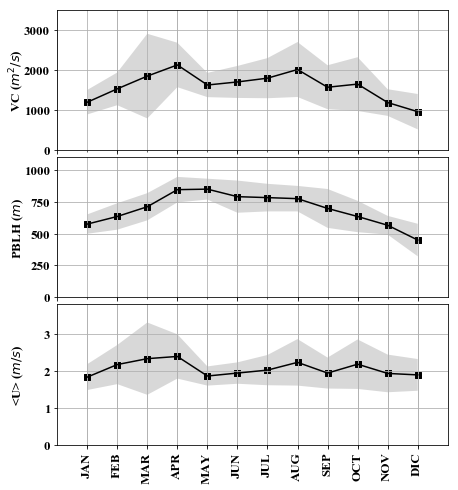

In [25]:
import matplotlib.gridspec as gridspec
plt.rcParams['font.family'] = "Times New Roman"
plt.rcParams.update({'font.size': 13})

minor_axis = np.linspace(1, 12, 12)

plt.figure(figsize = (7,8))
gs1 = gridspec.GridSpec(3,1)
gs1.update(hspace=0.05) # set the spacing between axes. 

ax1 = plt.subplot(gs1[0])

ax1.plot(anual_promedio['VC_24'], color = 'k')
ax1.fill_between(minor_axis, anual_promedio['VC_24'] - anual_promedio['VC_24_std'], anual_promedio['VC_24'] + anual_promedio['VC_24_std'], facecolor= 'grey', alpha=0.3, edgecolor='none')
ax1.scatter(anual_promedio.index.values, anual_promedio['VC_24'].values, marker = 's', color = 'k')

ax1.set_xticks(minor_axis, minor=True)
ax1.grid(which='both')
ax1.tick_params(labelbottom=False)
ax1.set_ylabel('VC ($m^2/s$)')
ax1.set_xlim(0, 13)
ax1.set_ylim(0, 3500)
ax1.get_yaxis().set_label_coords(-0.08,0.5)

ax2 = plt.subplot(gs1[1])

ax2.plot(anual_promedio['pblh_24'], color = 'k')
ax2.fill_between(minor_axis, anual_promedio['pblh_24'] - anual_promedio['pblh_24_std'], anual_promedio['pblh_24'] + anual_promedio['pblh_24_std'], facecolor= 'grey', alpha=0.3, edgecolor='none')
ax2.scatter(anual_promedio.index.values, anual_promedio['pblh_24'].values, marker = 's', color = 'k')

ax2.set_xticks(minor_axis, minor=True)
ax2.grid(which='both')
ax2.tick_params(labelbottom=False)
ax2.set_ylabel('PBLH ($m$)')
ax2.set_ylim(0, 1100)
ax2.set_xlim(0, 13)
ax2.get_yaxis().set_label_coords(-0.08,0.5)

ax3 = plt.subplot(gs1[2])

ax3.plot(anual_promedio['u_mean_24'], color = 'k')
ax3.fill_between(minor_axis, anual_promedio['u_mean_24'] - anual_promedio['u_mean_24_std'], anual_promedio['u_mean_24'] + anual_promedio['u_mean_24_std'], facecolor= 'grey', alpha=0.3, edgecolor='none')
ax3.scatter(anual_promedio.index.values, anual_promedio['u_mean_24'].values, marker = 's', color = 'k')

ax3.set_xticks(minor_axis, minor=True)
ax3.grid(which='both')
ax3.set_ylabel('<U> ($m/s$)')
ax3.set_xlim(0, 13)
ax3.set_ylim(0, 3.8)
ax3.get_yaxis().set_label_coords(-0.08,0.5)
ax3.set_xticks(range(1,13));
ax3.set_xticklabels(meses_nom);

plt.xticks(rotation=90)

In [25]:
anual_promedio

            VC_24  VC_24_std  pblh_24  pblh_24_std  u_mean_24  u_mean_24_std
month_ix                                                                    
1         1193.86     305.77   574.58        75.90       1.83           0.35
2         1527.60     407.72   634.39       103.69       2.17           0.53
3         1845.96    1056.07   710.67       106.65       2.33           0.98
4         2124.23     554.36   844.71       100.13       2.39           0.60
5         1623.60     302.84   848.71        81.80       1.86           0.26
6         1699.87     399.19   789.72       126.19       1.94           0.29
7         1794.26     500.80   782.28       108.21       2.02           0.41
8         2009.81     685.32   774.11       100.03       2.23           0.63
9         1567.84     548.41   697.49       152.45       1.94           0.42
10        1646.08     670.72   634.26       123.12       2.18           0.67
11        1185.76     332.51   565.60        73.63       1.93           0.51

In [56]:
2.06 * 695

1431.7

In [55]:
anual_promedio['u_mean_24'].mean()

2.059166666666667

In [35]:
anual.loc[i]['VC_24']

1193.8599999999999

In [ ]:
anual.loc[i]['VC_24'], ' & ', anual.loc[i]['pblh_24'], ' & ', anual.loc[i]['u_mean_24'], ' & '

In [39]:
months

{'apr': '04',
 'aug': '08',
 'dic': '12',
 'feb': '02',
 'jan': '01',
 'jul': '07',
 'jun': '06',
 'mar': '03',
 'may': '05',
 'nov': '11',
 'oct': '10',
 'sep': '09'}

In [40]:
meses_names = {1:'Enero', 2:'Febrero', 3:'Marzo', 4:'Abril', 5:'Mayo', 6:'Junio', 7:'Julio', 8:'Agosto', 9:'Septiembre', 10:'Octubre', 11:'Noviembre', 12:'Diciembre'}

In [41]:
meses_names[1]

'Enero'

In [50]:
for i in range(1,13):
    print(meses_names[i], ' & ' ,anual_promedio.loc[i]['VC_24'], ' & ', anual_promedio.loc[i]['pblh_24'], ' & ', anual_promedio.loc[i]['u_mean_24'], ' & ',anual.loc[i]['VC_24'], ' & ', anual.loc[i]['pblh_24'], ' & ', anual.loc[i]['u_mean_24'], "\\" + "\\")
          
          

Enero  &  1193.86  &  574.58  &  1.83  &  4322.24  &  1676.08  &  3.07 \\
Febrero  &  1527.6  &  634.39  &  2.17  &  5738.21  &  1747.08  &  3.89 \\
Marzo  &  1845.96  &  710.67  &  2.33  &  6744.23  &  1734.47  &  4.33 \\
Abril  &  2124.23  &  844.71  &  2.39  &  8139.48  &  2207.11  &  3.88 \\
Mayo  &  1623.6  &  848.71  &  1.86  &  6010.35  &  2216.56  &  3.03 \\
Junio  &  1699.87  &  789.72  &  1.94  &  5901.1  &  1904.73  &  3.35 \\
Julio  &  1794.26  &  782.28  &  2.02  &  6752.58  &  1947.22  &  3.81 \\
Agosto  &  2009.81  &  774.11  &  2.23  &  7371.68  &  1777.22  &  5.1 \\
Septiembre  &  1567.84  &  697.49  &  1.94  &  5478.37  &  1700.88  &  3.56 \\
Octubre  &  1646.08  &  634.26  &  2.18  &  5803.9  &  1376.36  &  4.81 \\
Noviembre  &  1185.76  &  565.6  &  1.93  &  3830.59  &  1429.26  &  3.03 \\
Diciembre  &  958.15  &  449.62  &  1.89  &  3471.42  &  1364.71  &  2.7 \\
